# Import modules

In [81]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from keras.regularizers import l1_l2
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.pipeline import Pipeline

# Import des datas

In [2]:
R = input("On est en local ? (Y)")
R = R.upper()

if R == 'Y':
    Path = 'G:/Mon Drive/Colab Notebooks/Projet S3/'
else:
    from google.colab import drive
    drive.mount('/content/drive')
    Path = '/content/drive/MyDrive/Colab Notebooks/Projet S3/'

On est en local ? (Y)n
Mounted at /content/drive


## Import de la base Train

In [3]:
PathTrain = Path + 'train.csv'
Train = pd.read_csv(PathTrain)

# Transforme la colonne ID en index
Train = Train.set_index('Id')

Train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Analyse de la base

In [4]:
# la taille de train
print(Train.shape)

# Moyenne de la colonnes SalePrice
mean = Train['SalePrice'].mean()
print(mean)

(1460, 80)
180921.19589041095


In [5]:
# Affiche le nombre de valeur différente pour chaque colonne
Train.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 80, dtype: int64

In [6]:
#Affiche les colonnes avec des valeurs manquantes et le nombre de valeurs manquantes
Train.isnull().sum()[Train.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
# Transforme certaines colonnes en catégorie : YearBuilt, YearRemodAdd, MoSold, YrSold, GarageYrBlt
Train['YearBuilt'] = Train['YearBuilt'].astype('object')
Train['YearRemodAdd'] = Train['YearRemodAdd'].astype('object')
Train['MoSold'] = Train['MoSold'].astype('object')
Train['YrSold'] = Train['YrSold'].astype('object')
Train['GarageYrBlt'] = Train['GarageYrBlt'].astype('object')

Train['MSSubClass']= Train['MSSubClass'].astype('object')
Train['OverallQual']= Train['OverallQual'].astype('object')
Train['OverallCond']= Train['OverallCond'].astype('object')

# Définir le nombre maximum de lignes à afficher
pd.set_option('display.max_rows', 100)
print(Train.dtypes)
Train.head()

# Affiche le nombre de variables numériques et catégoriques
NombreNum = Train.select_dtypes(include=['int64', 'float64']).shape[1]
NombreCat = Train.select_dtypes(include=['object']).shape[1]
print('Nombre de variables numériques: {}'.format(NombreNum))
print('Nombre de variables catégoriques: {}'.format(NombreCat))

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual       object
OverallCond       object
YearBuilt         object
YearRemodAdd      object
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


## Nettoyage de la base

In [8]:
# Ajustement de la base
Train['Alley'] = Train['Alley'].fillna('No alley')
Train['BsmtQual'] = Train['BsmtQual'].fillna('No Basement')
Train['BsmtCond'] = Train['BsmtCond'].fillna('No Basement')
Train['BsmtExposure'] = Train['BsmtExposure'].fillna('No Basement')
Train['BsmtFinType1'] = Train['BsmtFinType1'].fillna('No Basement')
Train['BsmtFinType2'] = Train['BsmtFinType2'].fillna('No Basement')
Train['FireplaceQu'] = Train['FireplaceQu'].fillna('No Fireplace')
Train['GarageType'] = Train['GarageType'].fillna('No Garage')
Train['GarageFinish'] = Train['GarageFinish'].fillna('No Garage')
Train['GarageQual'] = Train['GarageQual'].fillna('No Garage')
Train['GarageCond'] = Train['GarageCond'].fillna('No Garage')
Train['GarageYrBlt'] = Train['GarageYrBlt'].fillna('No Garage')
Train['PoolQC'] = Train['PoolQC'].fillna('No Pool')
Train['Fence'] = Train['Fence'].fillna('No Fence')
Train['MiscFeature'] = Train['MiscFeature'].fillna('No feature')
Train['LotFrontage'] = Train['LotFrontage'].fillna(0)
Train['MasVnrType'] = Train['MasVnrType'].fillna('No veneer')

Train.isnull().sum()[Train.isnull().sum()>0] # Affiche les colonnes avec des valeurs manquantes et le nombre de valeurs manquantes

MasVnrArea    8
Electrical    1
dtype: int64

In [9]:
# drop les lignes avec des valeurs manquantes
Train = Train.dropna()

In [10]:
Train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,No alley,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,No feature,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,No alley,Reg,Lvl,AllPub,FR2,...,0,No Pool,No Fence,No feature,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,No alley,IR1,Lvl,AllPub,Inside,...,0,No Pool,No Fence,No feature,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,No alley,IR1,Lvl,AllPub,Corner,...,0,No Pool,No Fence,No feature,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,No alley,IR1,Lvl,AllPub,FR2,...,0,No Pool,No Fence,No feature,0,12,2008,WD,Normal,250000


## Import de la base de validation

In [11]:
# Import de la vrai base de test
PathTest = Path + 'test.csv'
Test = pd.read_csv(PathTest)

# Transforme la colonne Id en index
Test = Test.set_index('Id')

# Ajustement de la base
Test['Alley'] = Test['Alley'].fillna('No alley')
Test['BsmtQual'] = Test['BsmtQual'].fillna('No Basement')
Test['BsmtCond'] = Test['BsmtCond'].fillna('No Basement')
Test['BsmtExposure'] = Test['BsmtExposure'].fillna('No Basement')
Test['BsmtFinType1'] = Test['BsmtFinType1'].fillna('No Basement')
Test['BsmtFinType2'] = Test['BsmtFinType2'].fillna('No Basement')
Test['FireplaceQu'] = Test['FireplaceQu'].fillna('No Fireplace')
Test['GarageType'] = Test['GarageType'].fillna('No Garage')
Test['GarageFinish'] = Test['GarageFinish'].fillna('No Garage')
Test['GarageQual'] = Test['GarageQual'].fillna('No Garage')
Test['GarageCond'] = Test['GarageCond'].fillna('No Garage')
Test['GarageYrBlt'] = Test['GarageYrBlt'].fillna('No Garage')
Test['PoolQC'] = Test['PoolQC'].fillna('No Pool')
Test['Fence'] = Test['Fence'].fillna('No Fence')
Test['MiscFeature'] = Test['MiscFeature'].fillna('No feature')
Test['LotFrontage'] = Test['LotFrontage'].fillna(0)
Test['MasVnrType'] = Test['MasVnrType'].fillna('No veneer')

# Transforme certaines colonnes en catégorie : YearBuilt, YearRemodAdd, MoSold, YrSold, GarageYrBlt
Test['YearBuilt'] = Test['YearBuilt'].astype('object')
Test['YearRemodAdd'] = Test['YearRemodAdd'].astype('object')
Test['MoSold'] = Test['MoSold'].astype('object')
Test['YrSold'] = Test['YrSold'].astype('object')
Test['GarageYrBlt'] = Test['GarageYrBlt'].astype('object')

Test['MSSubClass']= Test['MSSubClass'].astype('object')
Test['OverallQual']= Test['OverallQual'].astype('object')
Test['OverallCond']= Test['OverallCond'].astype('object')

Test.isnull().sum()[Test.isnull().sum()>0]

# Ici on va centré et réduire les données numériques
# On va créer une base avec les données numériques
TestNum = Test.select_dtypes(include=['int64', 'float64'])
# On va créer une base avec les données catégorielles
TestCat = Test.select_dtypes(include=['object'])
# On centre et réduit les données numériques
TestNum = (TestNum - TestNum.mean()) / TestNum.std()

# On va créer une base avec les données numériques centrées et réduites et les données catégorielles
TestP = pd.concat([TestNum, TestCat], axis=1)

# TestP = Test Si on centre réduit pas

TestP.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,0.684614,0.363804,-0.566973,0.063251,0.516994,-0.650173,-0.370554,-0.654337,-0.774988,-0.080456,...,TA,TA,Y,No Pool,MnPrv,No feature,6,2010,WD,Normal
1462,0.715606,0.897553,0.041046,1.062663,-0.297698,-0.339145,0.638706,0.433150,-0.774988,-0.080456,...,TA,TA,Y,No Pool,No Fence,Gar2,6,2010,WD,Normal
1463,0.498660,0.809368,-0.566973,0.772723,-0.297698,-0.954339,-0.266693,-0.573968,0.891638,-0.080456,...,TA,TA,Y,No Pool,MnPrv,No feature,3,2010,WD,Normal
1464,0.622629,0.032053,-0.454377,0.357583,-0.297698,-0.526677,-0.271209,-0.578991,0.836956,-0.080456,...,TA,TA,Y,No Pool,No Fence,No feature,6,2010,WD,Normal
1465,-0.462102,-0.971475,-0.566973,-0.387033,-0.297698,1.058191,0.528071,0.310085,-0.774988,-0.080456,...,TA,TA,Y,No Pool,No Fence,No feature,1,2010,WD,Normal


# Création d'un réseau de neurones

## Prétraitement et séparation des données

In [147]:
# Séparation des données en X et y
X = Train.drop('SalePrice', axis=1)
y = Train['SalePrice']

# Identifier les colonnes quantitatives et qualitatives
Quant_cols = X.select_dtypes(include=['int64', 'float64']).columns
Quali_cols = X.select_dtypes(include=['object']).columns

# Pipeline pour les variables quantitatives
quantitative_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Pipeline pour les variables qualitatives
qualitative_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', quantitative_transformer, Quant_cols),
        ('cat', qualitative_transformer, Quali_cols)])

# Transformer les colonnes qualitatives en str
for col in Quali_cols:
    X[col] = X[col].astype(str)

# Appliquer le préprocesseur
X_processed = preprocessor.fit_transform(X)

# Séparation en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

## Création de l'architecture

In [148]:
# Nombre de caractéristiques d'entrée
input_dim = X_train.shape[1]

# Création du modèle
model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Couche de sortie pour la prédiction de prix

model.summary()


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 128)               78976     
                                                                 
 dense_58 (Dense)            (None, 64)                8256      
                                                                 
 dense_59 (Dense)            (None, 1)                 65        
                                                                 
Total params: 87297 (341.00 KB)
Trainable params: 87297 (341.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compilation du modèle (Selection l'optimizer, la loss ,et des metriques)

In [149]:
model.compile(optimizer='RMSprop', loss='mean_squared_error', metrics=['mae'])

## Entrainement du modèle

In [150]:
history = model.fit(X_train_dense, y_train, validation_split=0.2, epochs=30, batch_size=32)

Epoch 1/30
29/29 [==============================] - 1s 7ms/step - loss: 39211122688.0000 - mae: 180840.1562 - val_loss: 38815100928.0000 - val_mae: 180370.5312
Epoch 2/30
29/29 [==============================] - 0s 3ms/step - loss: 39162085376.0000 - mae: 180710.7812 - val_loss: 38743191552.0000 - val_mae: 180180.2031
Epoch 3/30
29/29 [==============================] - 0s 3ms/step - loss: 39066365952.0000 - mae: 180455.1094 - val_loss: 38619963392.0000 - val_mae: 179853.4688
Epoch 4/30
29/29 [==============================] - 0s 2ms/step - loss: 38913314816.0000 - mae: 180047.6719 - val_loss: 38433648640.0000 - val_mae: 179359.7031
Epoch 5/30
29/29 [==============================] - 0s 3ms/step - loss: 38689763328.0000 - mae: 179462.0938 - val_loss: 38172467200.0000 - val_mae: 178665.2188
Epoch 6/30
29/29 [==============================] - 0s 2ms/step - loss: 38396174336.0000 - mae: 178667.8750 - val_loss: 37838266368.0000 - val_mae: 177770.9375
Epoch 7/30
29/29 [======================

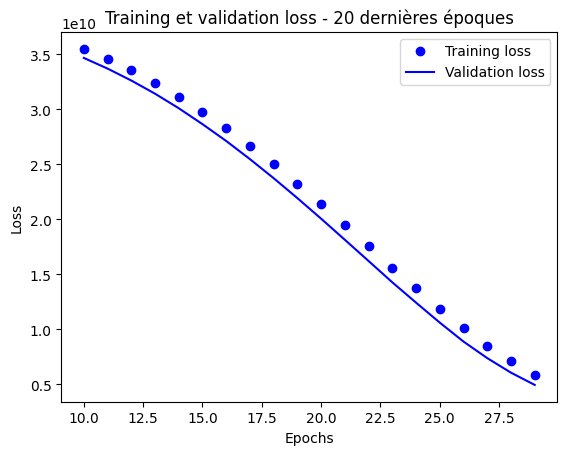

In [151]:
history_dict = history.history

# Extraction des valeurs de perte
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Nombre total d'époques
total_epochs = len(loss_values)

# Définissez le nombre d'époques à afficher
num_epochs_to_display = 20  # Mettez ici le nombre d'époques que vous souhaitez afficher

# Assurez-vous que le nombre d'époques à afficher n'est pas supérieur au nombre total d'époques
num_epochs_to_display = min(num_epochs_to_display, total_epochs)

# Affichage des époques spécifiées
epochs = range(total_epochs - num_epochs_to_display, total_epochs)

# Tracé de la perte d'entraînement pour les époques spécifiées
plt.plot(epochs, loss_values[-num_epochs_to_display:], 'bo', label='Training loss')

# Tracé de la perte de validation pour les époques spécifiées
plt.plot(epochs, val_loss_values[-num_epochs_to_display:], 'b', label='Validation loss')

plt.title(f'Training et validation loss - {num_epochs_to_display} dernières époques')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Evaluation du modèle

In [152]:
loss, mae = model.evaluate(X_test_dense, y_test)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

10/10 [==============================] - 0s 1ms/step - loss: 4494756352.0000 - mae: 41983.1289
Test Loss: 4494756352.0
Test MAE: 41983.12890625


Application sur le jeux de validation

In [153]:
TestP_processed = preprocessor.transform(TestP)
TestP_processed = TestP_processed.toarray()
predictions = model.predict(TestP_processed)

46/46 [==============================] - 0s 1000us/step


In [154]:
# Création du fichier de soumission
#On récupere l'index de Test
index = Test.index

#On crée un dataframe avec l'index et les prédictions
submission = pd.DataFrame({'Id': index, 'SalePrice': predictions.flatten()})
submission.head()

submission.to_csv(Path + 'Submission Réseau.csv', index=False)